In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Categorical Feature Encoding Challenge

In [2]:
df = pd.read_csv('./data/cat_train.csv')
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [3]:
df.sort_values('bin_0', inplace=True, ascending=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 260353 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

### Stratified k-fold cross validation

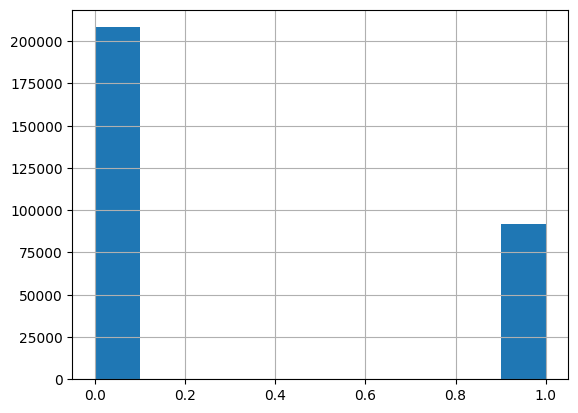

In [7]:
df.target.hist()
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
260353,260353,1,0,0,1,0,1,2,5,1,...,11336,0,2,1,0,13,91,0,7,0
106057,106057,1,0,0,1,1,0,4,5,3,...,7772,0,4,1,0,9,117,3,4,0
34388,34388,1,0,0,1,1,1,3,4,2,...,2127,1,4,2,10,20,67,0,11,1
238041,238041,1,0,0,1,1,2,1,3,3,...,8945,1,4,4,4,18,31,0,4,0
106044,106044,1,0,0,1,0,2,5,0,2,...,973,0,2,2,9,22,191,2,3,1


In [9]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 260353 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      300000 non-null  int64
 1   bin_0   300000 non-null  int64
 2   bin_1   300000 non-null  int64
 3   bin_2   300000 non-null  int64
 4   bin_3   300000 non-null  int64
 5   bin_4   300000 non-null  int64
 6   nom_0   300000 non-null  int64
 7   nom_1   300000 non-null  int64
 8   nom_2   300000 non-null  int64
 9   nom_3   300000 non-null  int64
 10  nom_4   300000 non-null  int64
 11  nom_5   300000 non-null  int64
 12  nom_6   300000 non-null  int64
 13  nom_7   300000 non-null  int64
 14  nom_8   300000 non-null  int64
 15  nom_9   300000 non-null  int64
 16  ord_0   300000 non-null  int64
 17  ord_1   300000 non-null  int64
 18  ord_2   300000 non-null  int64
 19  ord_3   300000 non-null  int64
 20  ord_4   300000 non-null  int64
 21  ord_5   300000 non-null  int64
 22  day     300000 non-n

In [2]:
from sklearn.model_selection import train_test_split


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('target', axis = 1), df.target, test_size=0.33)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
estimator = LogisticRegression()

estimator.fit(X_train, y_train)
accuracy_score(y_test, estimator.predict(X_test))

0.6886464646464646

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np



In [ ]:
kf = KFold(n_splits=3)
estimator = LogisticRegression()
np.mean(cross_val_score(estimator, df_encoded.drop('target', axis = 1), df_encoded.target, scoring ='accuracy',cv =kf))

In [13]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=3)
np.mean(cross_val_score(estimator, df_encoded.drop('target', axis = 1), df.target, scoring ='accuracy',cv =kf))

0.68913

### Time Series cross validation

In [14]:
df['year']=2021
df['date'] = df.apply(lambda x: pd.to_datetime(str(x['year']) + "-" + str(x['month']) + "-" + str(x['day'])),  axis =1)

In [15]:
df['date'].head()

260353   2021-08-01
106057   2021-05-04
34388    2021-12-01
238041   2021-05-01
106044   2021-04-03
Name: date, dtype: datetime64[ns]

In [16]:
df.set_index('date', inplace=True)

In [17]:
df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,year
date,,,,,,,,,,,,,,,,,,,,,
2021-08-01,260353,1,0,0,1,0,1,2,5,1,...,0,2,1,0,13,91,0,7,0,0
2021-05-04,106057,1,0,0,1,1,0,4,5,3,...,0,4,1,0,9,117,3,4,0,0
2021-12-01,34388,1,0,0,1,1,1,3,4,2,...,1,4,2,10,20,67,0,11,1,0
2021-05-01,238041,1,0,0,1,1,2,1,3,3,...,1,4,4,4,18,31,0,4,0,0
2021-04-03,106044,1,0,0,1,0,2,5,0,2,...,0,2,2,9,22,191,2,3,1,0


In [18]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

tscv = TimeSeriesSplit(n_splits = 5)
accuracy = []
for train_index, test_index in tscv.split(df_encoded.sort_index()):
    cv_train, cv_test = df_encoded.iloc[train_index], df_encoded.iloc[test_index]
    
    estimator.fit(cv_train.drop('target', axis = 1), cv_train.target)
    
    predictions = estimator.predict(cv_test.drop('target', axis = 1))
    accuracy.append(accuracy_score(cv_test.target, predictions))
    
print("accuracy: {}".format(np.mean(accuracy)))

accuracy: 0.686064


In [19]:
np.mean(cross_val_score(estimator, df_encoded.sort_index().drop('target', axis = 1), df_encoded.sort_index().target, scoring ='accuracy',cv =tscv))

0.683664

---
### Homework

Задание 5.1

1 point possible (graded)
Загрузите датасет о клиентах страховой компании. Целевой переменной для предсказания в этом датасете является столбец 'Vehicle_Damage', который показывает, будет ли клиент заинтересован в страховании транспортных средств. С помощью LabelEncoder из sklearn.preprocessing закодируйте 'Vehicle_Damage'.

Можно ли считать целевую переменную сбалансированной?

In [20]:
df = pd.read_csv("./data/aug_train.csv")

In [21]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


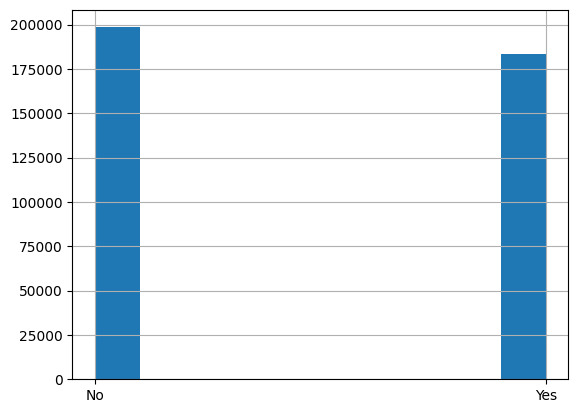

In [23]:
df["Vehicle_Damage"].hist()
plt.show()

Задание 5.3


Какое значение метрики  получится, если запустить кросс-валидацию с GradientBoostingClassifier и с необходимым типом k-fold-разбиения с тремя итерациями? В качестве признаков возьмите все столбцы с типом int64 и float64. Ответ округлите до двух знаков.

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
df["Vehicle_Damage"] = df["Vehicle_Damage"].map({"No": 0, "Yes": 1})

In [41]:
features = []
for i in df.columns.to_list():
    if df[i].dtype in ["int64", "float64"]:
        features.append(i)
    else:
        pass
    
features

['id',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [47]:
df_feat = df[features].drop("Vehicle_Damage", axis=1)
df_target = df["Vehicle_Damage"]

In [50]:
kf = KFold(n_splits=3)

booster = GradientBoostingClassifier()
print(
    np.mean(cross_val_score(
        estimator=booster, X=df_feat, y=df_target, scoring="accuracy", n_jobs=-1, cv=kf
    ))
)

0.927636500362795


Задание 5.4

Загрузите датасет о бездомных питомцах и скорости принятия их в семью по различным характеристикам.

Можно ли считать целевую переменную «скорость принятия» (AdoptionSpeed) сбалансированной?

In [4]:
df_2 = pd.read_csv("./data/adoption_prediction.csv")
df_2.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


<function matplotlib.pyplot.show(close=None, block=None)>

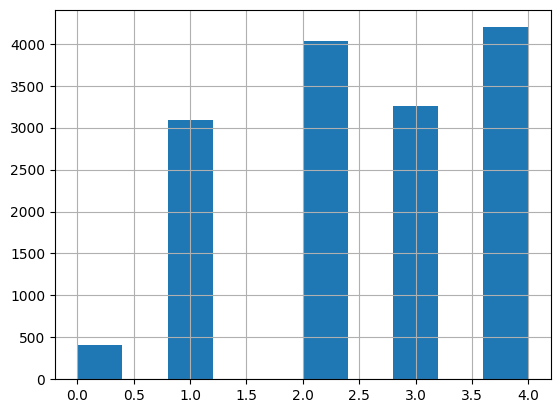

In [5]:
df_2["AdoptionSpeed"].hist()
plt.show

Задание 5.6


Какое значение метрики accuracy  получится, если запустить кросс-валидацию с GradientBoostingClassifier и с необходимым типом k-fold-разбиения с тремя итерациями? Для обучения используйте признаки: 'Type','Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State','PhotoAmt','VideoAmt'. Ответ округлите до одного знака.

In [8]:
from sklearn.model_selection import StratifiedKFold

features = [
    "Type",
    "Age",
    "Breed1",
    "Breed2",
    "Gender",
    "Color1",
    "Color2",
    "Color3",
    "MaturitySize",
    "FurLength",
    "Vaccinated",
    "Dewormed",
    "Sterilized",
    "Health",
    "Quantity",
    "Fee",
    "State",
    "PhotoAmt",
    "VideoAmt",
]

df_2_feat = df_2[features]
df_2_target = df_2["AdoptionSpeed"]

cv_score = cross_val_score(estimator=GradientBoostingClassifier(),
                           X=df_2_feat,
                           y=df_2_target,
                           cv=StratifiedKFold(n_splits=3),
                           scoring="accuracy",
                           n_jobs=-1)

print(np.mean((cv_score)))

0.4005462768123726


Задание 5.7

Если разбить эти данные с помощью train_test_split на две выборки без перемешивания (shuffle=False) пополам (test_size=0.5) и сравнить распределения признаков из предыдущего задания ('Type','Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2','Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed','Sterilized', 'Health', 'Quantity', 'Fee', 'State','PhotoAmt','VideoAmt'), какое медианное значение дивергенции Кульбака-Лейблера получится (np.median(kl_div(...)))? Ответ округлите до двух знаков.

In [9]:
from scipy.special import kl_div

In [10]:
X_train, X_test = train_test_split(df_2_feat, test_size=0.5, shuffle=False)

In [20]:
np.median(kl_div(X_train.values, X_test.values))

0.06801529621588998